In [241]:
!pip install lightgbm category-encoders sklearn pandas==1.1.5

In [242]:
!git clone https://github.com/wenkaicn/ML-000.git

fatal: destination path 'ML-000' already exists and is not an empty directory.


In [243]:
import pandas as pd
import numpy as np


In [244]:
loans = pd.read_csv('./ML-000/Week09/train_final.csv', engine='python')
test = pd.read_csv('./ML-000/Week09/test_final.csv', engine='python')

In [245]:
loans.shape

(50000, 146)

In [246]:
loans.loan_status.value_counts()

1    39788
0    10212
Name: loan_status, dtype: int64

In [247]:
loans.head()


,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,continuous_installment,continuous_int_rate,continuous_last_fico_range_high,continuous_last_fico_range_low,continuous_loan_amnt,loan_status,continuous_mths_since_last_delinq,continuous_mths_since_last_major_derog,continuous_mths_since_last_record,continuous_open_acc,continuous_pub_rec,discrete_addr_state_1_one_hot,discrete_addr_state_2_one_hot,discrete_addr_state_3_one_hot,discrete_addr_state_4_one_hot,discrete_addr_state_5_one_hot,discrete_addr_state_6_one_hot,discrete_addr_state_7_one_hot,discrete_addr_state_8_one_hot,discrete_addr_state_9_one_hot,discrete_addr_state_10_one_hot,discrete_addr_state_11_one_hot,discrete_addr_state_12_one_hot,discrete_addr_state_13_one_hot,discrete_addr_state_14_one_hot,discrete_addr_state_15_one_hot,discrete_addr_state_16_one_hot,discrete_addr_state_17_one_hot,discrete_addr_state_18_one_hot,discrete_addr_state_19_one_hot,discrete_addr_state_20_one_hot,discrete_addr_state_21_one_hot,discrete_addr_state_22_one_hot,discrete_addr_state_23_one_hot,discrete_addr_state_24_one_hot,discrete_addr_state_25_one_hot,discrete_addr_state_26_one_hot,discrete_addr_state_27_one_hot,discrete_addr_state_28_one_hot,discrete_addr_state_29_one_hot,discrete_addr_state_30_one_hot,discrete_addr_state_31_one_hot,discrete_addr_state_32_one_hot,discrete_addr_state_33_one_hot,discrete_addr_state_34_one_hot,discrete_addr_state_35_one_hot,discrete_addr_state_36_one_hot,discrete_addr_state_37_one_hot,discrete_addr_state_38_one_hot,discrete_addr_state_39_one_hot,discrete_addr_state_40_one_hot,discrete_addr_state_41_one_hot,discrete_addr_state_42_one_hot,discrete_addr_state_43_one_hot,discrete_addr_state_44_one_hot,discrete_addr_state_45_one_hot,discrete_addr_state_46_one_hot,discrete_addr_state_47_one_hot,discrete_addr_state_48_one_hot,discrete_addr_state_49_one_hot,discrete_application_type_1_one_hot,discrete_application_type_2_one_hot,discrete_emp_length_1_one_hot,discrete_emp_length_2_one_hot,discrete_emp_length_3_one_hot,discrete_emp_length_4_one_hot,discrete_emp_length_5_one_hot,discrete_emp_length_6_one_hot,discrete_emp_length_7_one_hot,discrete_emp_length_8_one_hot,discrete_emp_length_9_one_hot,discrete_emp_length_10_one_hot,discrete_emp_length_11_one_hot,discrete_emp_length_12_one_hot,discrete_grade_1_one_hot,discrete_grade_2_one_hot,discrete_grade_3_one_hot,discrete_grade_4_one_hot,discrete_grade_5_one_hot,discrete_grade_6_one_hot,discrete_grade_7_one_hot,discrete_home_ownership_1_one_hot,discrete_home_ownership_2_one_hot,discrete_home_ownership_3_one_hot,discrete_home_ownership_4_one_hot,discrete_policy_code_1_one_hot,discrete_purpose_1_one_hot,discrete_purpose_2_one_hot,discrete_purpose_3_one_hot,discrete_purpose_4_one_hot,discrete_purpose_5_one_hot,discrete_purpose_6_one_hot,discrete_purpose_7_one_hot,discrete_purpose_8_one_hot,discrete_purpose_9_one_hot,discrete_purpose_10_one_hot,discrete_purpose_11_one_hot,discrete_purpose_12_one_hot,discrete_pymnt_plan_1_one_hot,discrete_sub_grade_1_one_hot,discrete_sub_grade_2_one_hot,discrete_sub_grade_3_one_hot,discrete_sub_grade_4_one_hot,discrete_sub_grade_5_one_hot,discrete_sub_grade_6_one_hot,discrete_sub_grade_7_one_hot,discrete_sub_grade_8_one_hot,discrete_sub_grade_9_one_hot,discrete_sub_grade_10_one_hot,discrete_sub_grade_11_one_hot,discrete_sub_grade_12_one_hot,discrete_sub_grade_13_one_hot,discrete_sub_grade_14_one_hot,discrete_sub_grade_15_one_hot,discrete_sub_grade_16_one_hot,discrete_sub_grade_17_one_hot,discrete_sub_grade_18_one_hot,discrete_sub_grade_19_one_hot,discrete_sub_grade_20_one_hot,discrete_sub_grade_21_one_hot,discrete_sub_grade_22_one_hot,discrete_sub_grade_23_one_hot,discrete_sub_grade_24_one_hot,discrete_sub_grade_25_one_hot,discrete_sub_grade_26_one_hot,discrete_sub_grade_27_one_hot,discrete_sub_grade_28_one_hot,d

In [248]:
missing_fractions = loans.isnull().sum().sort_values(ascending=False)
missing_fractions.head(20)

continuous_annual_inc_joint               49780
continuous_dti_joint                      49780
continuous_mths_since_last_record         40505
continuous_mths_since_last_major_derog    34948
continuous_mths_since_last_delinq         23917
continuous_dti                                1
discrete_addr_state_29_one_hot                0
discrete_addr_state_34_one_hot                0
discrete_addr_state_33_one_hot                0
discrete_addr_state_32_one_hot                0
discrete_addr_state_31_one_hot                0
discrete_addr_state_30_one_hot                0
discrete_addr_state_27_one_hot                0
discrete_addr_state_28_one_hot                0
discrete_addr_state_36_one_hot                0
discrete_addr_state_26_one_hot                0
discrete_addr_state_25_one_hot                0
discrete_addr_state_24_one_hot                0
discrete_addr_state_23_one_hot                0
discrete_addr_state_22_one_hot                0
dtype: int64

In [249]:
print(sorted(loans.columns))

['continuous_annual_inc', 'continuous_annual_inc_joint', 'continuous_delinq_2yrs', 'continuous_dti', 'continuous_dti_joint', 'continuous_fico_range_high', 'continuous_fico_range_low', 'continuous_funded_amnt', 'continuous_funded_amnt_inv', 'continuous_inq_last_6mths', 'continuous_installment', 'continuous_int_rate', 'continuous_last_fico_range_high', 'continuous_last_fico_range_low', 'continuous_loan_amnt', 'continuous_mths_since_last_delinq', 'continuous_mths_since_last_major_derog', 'continuous_mths_since_last_record', 'continuous_open_acc', 'continuous_pub_rec', 'discrete_addr_state_10_one_hot', 'discrete_addr_state_11_one_hot', 'discrete_addr_state_12_one_hot', 'discrete_addr_state_13_one_hot', 'discrete_addr_state_14_one_hot', 'discrete_addr_state_15_one_hot', 'discrete_addr_state_16_one_hot', 'discrete_addr_state_17_one_hot', 'discrete_addr_state_18_one_hot', 'discrete_addr_state_19_one_hot', 'discrete_addr_state_1_one_hot', 'discrete_addr_state_20_one_hot', 'discrete_addr_state_

In [250]:
#将连续值列和onehot编码列拆开
c_columns = []
d_columns = []
for column in loans.columns:
  if column.startswith('continuous'):
    c_columns.append(column)
  if column.startswith('discrete'):
    d_columns.append(column)
loans_c = loans[c_columns]
loans_d = loans[d_columns]


In [251]:
loans_c.describe()

,continuous_annual_inc,continuous_annual_inc_joint,continuous_delinq_2yrs,continuous_dti,continuous_dti_joint,continuous_fico_range_high,continuous_fico_range_low,continuous_funded_amnt,continuous_funded_amnt_inv,continuous_inq_last_6mths,continuous_installment,continuous_int_rate,continuous_last_fico_range_high,continuous_last_fico_range_low,continuous_loan_amnt,continuous_mths_since_last_delinq,continuous_mths_since_last_major_derog,continuous_mths_since_last_record,continuous_open_acc,continuous_pub_rec
count,5.000000e+04,220.000000,50000.00000,49999.000000,220.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,26083.000000,15052.000000,9495.000000,50000.000000,50000.000000
mean,7.835886e+04,109248.802545,0.34738,19.080239,18.831864,698.404460,694.404300,14332.53650,14325.533000,0.620820,428.892109,11.986125,675.644860,658.428400,14332.53650,34.197485,44.214589,65.500790,11.944960,0.252820
std,9.783053e+04,52319.230212,0.91874,9.802002,7.586033,31.180915,31.180139,8617.58487,8612.853833,0.906035,254.569184,4.182402,81.571458,133.005552,8617.58487,21.828204,21.352291,23.659021,5.676976,0.665455
min,0.000000e+00,28000.000000,0.00000,0.000000,3.000000,664.000000,660.000000,1000.00000,950.000000,0.000000,14.770000,5.320000,0.000000,0.000000,1000.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4.700000e+04,76000.000000,0.00000,12.410000,13.805000,674.000000,670.000000,7775.00000,7750.000000,0.000000,244.242500,9.170000,624.000000,620.000000,7775.00000,16.000000,27.000000,51.000000,8.000000,0.000000
50%,6.500000e+04,99000.000000,0.00000,18.520000,17.940000,689.000000,685.000000,12000.00000,12000.000000,0.000000,369.520000,11.490000,689.000000,685.000000,12000.00000,31.000000,44.000000,67.000000,11.000000,0.000000
75%,9.400000e+04,132700.000000,0.00000,25.320000,23.477500,714.000000,710.000000,20000.00000,20000.000000,1.000000,572.850000,14.330000,734.000000,730.000000,20000.00000,50.000000,63.000000,81.000000,15.000000,0.000000
max,9.000000e+06,500000.000000,15.00000,999.000000,43.860000,850.000000,845.000000,35000.00000,35000.000000,5.000000,1354.660000,28.990000,850.000000,845.000000,35000.00000,152.000000,152.000000,120.000000,67.000000,23.000000


In [252]:
pd.set_option('max_columns',1000)
pd.set_option('max_row',300)
loans_d.sum()

discrete_addr_state_1_one_hot           1694
discrete_addr_state_2_one_hot            100
discrete_addr_state_3_one_hot           1944
discrete_addr_state_4_one_hot           1669
discrete_addr_state_5_one_hot            900
discrete_addr_state_6_one_hot            613
discrete_addr_state_7_one_hot            220
discrete_addr_state_8_one_hot           1378
discrete_addr_state_9_one_hot           6869
discrete_addr_state_10_one_hot          1435
discrete_addr_state_11_one_hot          1257
discrete_addr_state_12_one_hot           848
discrete_addr_state_13_one_hot          1180
discrete_addr_state_14_one_hot          4085
discrete_addr_state_15_one_hot          4156
discrete_addr_state_16_one_hot           408
discrete_addr_state_17_one_hot           290
discrete_addr_state_18_one_hot           625
discrete_addr_state_19_one_hot           969
discrete_addr_state_20_one_hot          1676
discrete_addr_state_21_one_hot           570
discrete_addr_state_22_one_hot          3569
discrete_a

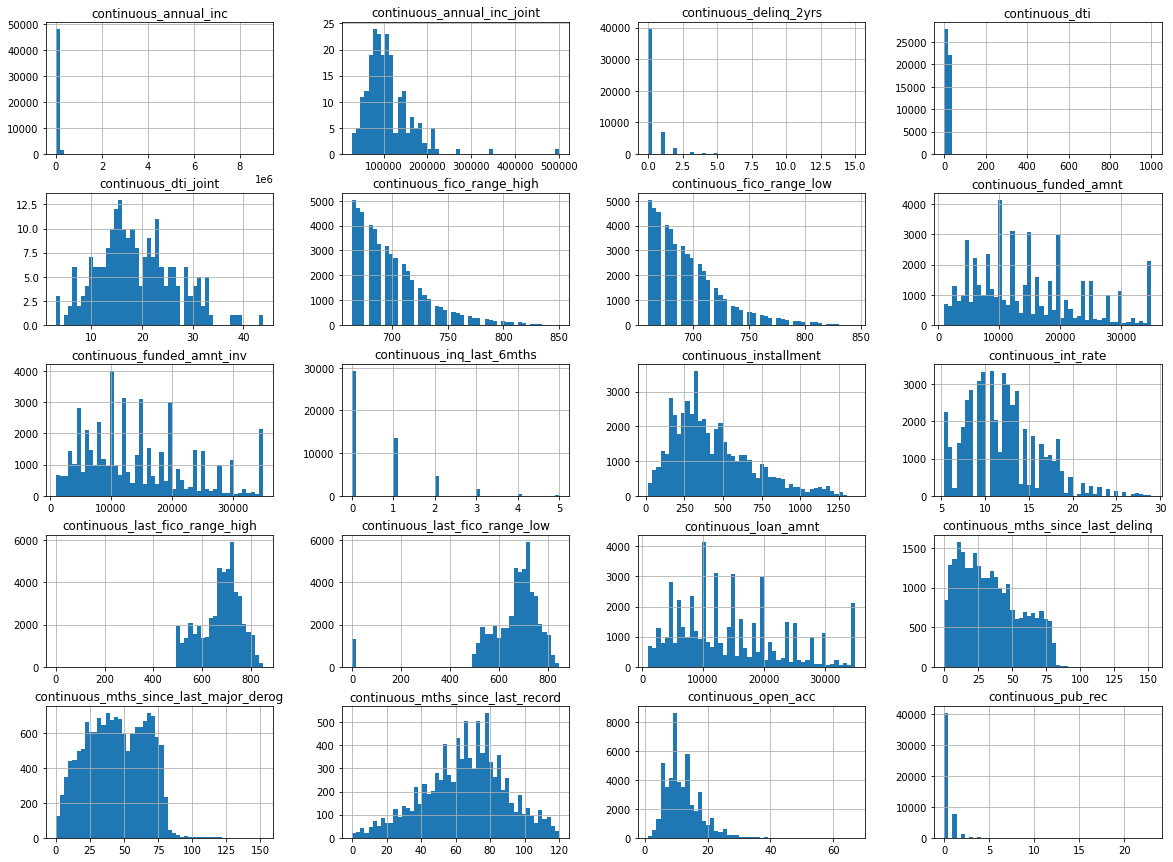

In [253]:
%matplotlib inline
import matplotlib.pyplot as plt
loans_c.hist(bins=50, figsize=(20,15))
plt.show()

(array([  38.,  626., 2236., 4675., 6207., 6497., 6287., 5250., 4065.,
        3087., 2569., 1674., 1804.,  998.,  698.,  807.,  429.,  326.,
         283.,  133.,  267.,   98.,  137.,   68.,   58.,  147.,   46.,
          37.,   39.]),
 array([     0,  10000,  20000,  30000,  40000,  50000,  60000,  70000,
         80000,  90000, 100000, 110000, 120000, 130000, 140000, 150000,
        160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000,
        240000, 250000, 260000, 270000, 280000, 290000]),
 <a list of 29 Patch objects>)

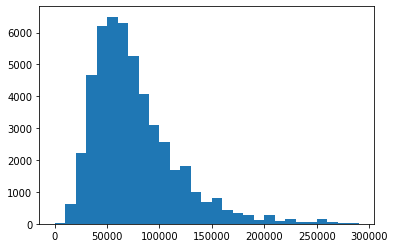

In [254]:
plt.hist(loans_c.continuous_annual_inc, bins=np.arange(0,300000,10000))

(array([2.0140e+03, 6.1440e+03, 9.5220e+03, 1.0326e+04, 8.9680e+03,
        6.8500e+03, 4.1960e+03, 1.9380e+03, 9.0000e+00, 1.2000e+01,
        6.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

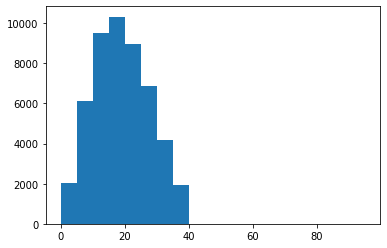

In [255]:
plt.hist(loans_c.continuous_dti, bins=np.arange(0,100,5))

#数据探索

##本次贷款情况
1.   funded_amnt 与 loan_amnt 两列完全相同；funded_amnt 与funded_amnt_inv 有个别差异，尝试相减
##借款人实力
2.   annual_inc_joint与dti_joint绝大多数为空，说明仅少量贷款为联名申请 
3.   根据计算，dti（还款额除以月收入）是指总还款额，不是本次贷款还款额，因此dti值越小越好
2.   annual_inc_joint将空值转为0是否合理？dti_joint的空值该如何处理？考虑将_joint联名申请的情况单独构造onehot编码~ application_type已有
5.   annual_inc和dti的数据都存在明显异常点，例如annual_inc的最大值为9百万
##借款人信用记录
3.   pub_rec不为0，mths_since_last_record才有相应数据，否则为空 
4.   有delinq的人比major_derog的多。感觉deling拖欠较普遍，而 major_derog是更严重的负面指标（例如拖欠90天或其他未必是拖欠的行为因少部分人有major_derog没有delinq）
5.   mths_since_last_record、mths_since_last_delinq、mths_since_last_major_derog空值处理，考虑将空值替换为一个极大值，当前数据中的最大值为152，可以考虑将空值替换为240？ 

In [256]:
import lightgbm as lgb
#train_dataset = lgb.Dataset(loans.drop(columns='loan_status'), loans['loan_status'])
#test_dataset = lgb.Dataset(test.drop(columns='loan_status'), test['loan_status'])

In [257]:
import io
import multiprocessing
from contextlib import redirect_stdout
from copy import deepcopy
from dataclasses import dataclass, asdict
import hyperopt.pyll
from hyperopt import fmin, tpe, hp
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
import torch

import copy
cpu_count = 4
use_gpu = False
@dataclass
class LGBOpt:
    num_threads: any = hp.choice('num_threads', [cpu_count])
    objective: any = hp.choice('objective', ['binary'])
    metric: any = hp.choice('metric', ['binary_error'])

    num_leaves: any = hp.choice('num_leaves', [16])
    num_round: any = hp.choice('num_round', [1000])
    #learning_rate: any = hp.uniform('learning_rate', 0.01, 0.1)
    learning_rate: any = hp.choice('learning_rate', [0.02])
    feature_fraction: any = hp.uniform('feature_fraction', 0.5, 1.0)
    bagging_fraction: any = hp.uniform('bagging_fraction', 0.8, 1.0)
    #device_type: any = hp.choice('device_tpye', ['gpu']) if use_gpu else hp.choice('device_type',['cpu'])
    boosting: any = hp.choice('boosting', ['gbdt', 'dart', 'goss'])
    extra_trees: any = hp.choice('extra_tress', [False, True])
    drop_rate: any = hp.uniform('drop_rate', 0, 0.2)
    uniform_drop: any = hp.choice('uniform_drop', [True, False])
    lambda_l1: any = hp.uniform('lambda_l1', 0, 10)  # TODO: Check range
    lambda_l2: any = hp.uniform('lambda_l2', 0, 10)  # TODO: Check range
    min_gain_to_split: any = hp.uniform('min_gain_to_split', 0, 1)  # TODO: Check range
    min_data_in_bin = hp.choice('min_data_in_bin', [3, 5, 10, 15, 20, 50])

    @staticmethod
    def get_common_params():
        return {'num_thread': 4, 'num_leaves': 12, 'metric': 'binary', 'objective': 'binary',
                'num_round': 1000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
    

In [258]:
class FitterBase(object):
    def __init__(self, label, metric, max_eval=50, opt=None):
        self.label = label
        self.metric = metric
        self.opt_params = dict()
        self.max_eval = max_eval
        self.opt = opt

    def get_loss(self, y, y_pred):
        if self.metric == 'error':
            return 1 - accuracy_score(y, y_pred)
        elif self.metric == 'precision':
            return 1 - precision_score(y, y_pred)
        elif self.metric == 'recall':
            return 1 - recall_score(y, y_pred)
        elif self.metric == 'macro_f1':
            return 1 - f1_score(y, y_pred, average='macro')
        elif self.metric == 'micro_f1':
            return 1 - f1_score(y, y_pred, average='micro')
        elif self.metric == 'auc':  # TODO: Add a warning checking if y_predict is all [0, 1], it should be probability
            return 1 - roc_auc_score(y, y_pred)
        else:
            raise Exception("Not implemented yet.")

In [259]:
class LGBFitter(FitterBase):
    def __init__(self, label='label', metric='error', opt: LGBOpt = None, max_eval=50):
        super(LGBFitter, self).__init__(label, metric, max_eval)
        if opt is not None:
            self.opt = opt
        else:
            self.opt = LGBOpt()
        self.best_round = None
        self.clf = None

    #训练完模型会用self.best_round记录最佳的一轮（森林中树的数量）
    def train(self, train_df, eval_df, params=None, use_best_eval=True):
        self.best_round = None
        dtrain = lgb.Dataset(train_df.drop(columns=[self.label]), train_df[self.label])
        deval = lgb.Dataset(eval_df.drop(columns=[self.label]), eval_df[self.label])
        evallist = [dtrain, deval]
        if params is None:
            use_params = deepcopy(self.opt_params)
        else:
            use_params = deepcopy(params)

        num_round = use_params.pop('num_round')
        if use_best_eval:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            min_error = np.inf
            min_index = 0
            for idx in range(len(output) - 1):
                if len(output[idx].split("\t")) == 3:
                    temp = float(output[idx].split("\t")[2].split(":")[1])
                    if min_error > temp:
                        min_error = temp
                        min_index = int(output[idx].split("\t")[0][1:-1])
            print("The minimum is attained in round %d" % (min_index))
            self.best_round = min_index  ##修改：经验证best_round不应该等于min_index+1
            #return output
            train_min_error = float(output[min_index].split("\t")[1].split(":")[1])
            return min_index, train_min_error, min_error
        else:
            with io.StringIO() as buf, redirect_stdout(buf):
                self.clf = lgb.train(use_params, dtrain, num_round, valid_sets=evallist)
                output = buf.getvalue().split("\n")
            self.best_round = num_round
            return output

    def search(self, train_df, eval_df, use_best_eval=True):
        self.opt_params = dict()

        def train_impl(params):
            self.train(train_df, eval_df, params, use_best_eval)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            return self.get_loss(eval_df[self.label], y_pred)

        self.opt_params = fmin(train_impl, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    #
    def search_k_fold(self, k_fold, data, use_best_eval=True):
        self.opt_params = dict()

        def train_impl_nfold(params):
            loss = list()
            for train_id, eval_id in k_fold.split(data):
                train_df = data.loc[train_id]
                eval_df = data.loc[eval_id]
                self.train(train_df, eval_df, params, use_best_eval)
                if self.metric == 'auc':
                    y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
                else:
                    y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                               num_iteration=self.best_round) > 0.5).astype(int)
                loss.append(self.get_loss(eval_df[self.label], y_pred))
            return np.mean(loss)

        self.opt_params = fmin(train_impl_nfold, asdict(self.opt), algo=tpe.suggest, max_evals=self.max_eval)

    
    #在训练集上训练验证集上验证得到模型准确度~如果5折交叉验证就得到5个模型和5个准确度
    def train_k_fold(self, k_fold, train_data, test_data, params=None, drop_test_y=True, use_best_eval=True):
        acc_result = list()
        train_pred = np.empty(train_data.shape[0])
        test_pred = np.zeros(test_data.shape[0])  ##修改：原np.empty()未做初始化
        if drop_test_y:
            dtest = test_data.drop(columns=self.label)
        else:
            dtest = test_data

        models = list()
        for train_id, eval_id in k_fold.split(train_data):
            train_df = train_data.loc[train_id]
            eval_df = train_data.loc[eval_id]
            self.train(train_df, eval_df, params, use_best_eval)
            models.append(copy.deepcopy(self.clf))
            train_pred[eval_id] = self.clf.predict(eval_df.drop(columns=self.label), num_iteration=self.best_round)
            if self.metric == 'auc':
                y_pred = self.clf.predict(eval_df.drop(columns=[self.label]), num_iteration=self.best_round)
            else:
                y_pred = (self.clf.predict(eval_df.drop(columns=[self.label]),
                                           num_iteration=self.best_round) > 0.5).astype(int)
            acc_result.append(self.get_loss(eval_df[self.label], y_pred))
            test_pred += self.clf.predict(dtest, num_iteration=self.best_round)
        test_pred /= k_fold.n_splits
        return train_pred, test_pred, acc_result, models
        # train_pred 在相应验证集上的预测效果，五个模型的预测结果拼起来就是完整的训练集效果
        # test_pred 五个模型在测试集的预测效果的平均（可以算是一种模型集成）
        # acc_result 五个模型在验证集的准确度（如何评估对应参数）


#调参
##基础参数的选择
使用不同的num_leaves值进行训练，将结果记录在df中，比较哪个值得到模型最优。
同时看不同学习率的影响情况

In [260]:
fitter = LGBFitter(label='loan_status')
params = {'num_thread': 4, 'metric': 'binary_error', 'objective': 'binary',
                'num_leaves': 31, 'num_round': 1000, 'learning_rate': 0.02, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
row_list = []
for r in [0.01, 0.02, 0.03]:
  params['learning_rate'] = r
  for n in [12,16,17,18,20,32]:
    params['num_leaves'] = n
    (min_round, train_error, error_rate) = fitter.train(loans,test,params = params)
    dict1 = dict(num_leaves = n, learning_rate = r, num_round = min_round, 
                 error_rate = error_rate, train_error = train_error) 
    row_list.append(dict1)

df1 = pd.DataFrame(row_list)

The minimum is attained in round 672
The minimum is attained in round 622
The minimum is attained in round 719
The minimum is attained in round 724
The minimum is attained in round 628
The minimum is attained in round 609
The minimum is attained in round 441
The minimum is attained in round 555
The minimum is attained in round 359
The minimum is attained in round 365
The minimum is attained in round 557
The minimum is attained in round 300
The minimum is attained in round 491
The minimum is attained in round 237
The minimum is attained in round 235
The minimum is attained in round 328
The minimum is attained in round 249
The minimum is attained in round 204


In [261]:
df1.sort_values(['error_rate'],ascending=True)

,num_leaves,learning_rate,num_round,error_rate,train_error
2,17,0.02,359,0.08184,0.07500
1,16,0.02,555,0.08188,0.07336
10,20,0.01,628,0.08190,0.07456
7,16,0.01,622,0.08194,0.07562
12,12,0.03,491,0.08196,0.07394
0,12,0.02,441,0.08198,0.07576
17,32,0.03,204,0.08200,0.07124
15,18,0.03,328,0.08202,0.07284
9,18,0.01,724,0.08204,0.07450
3,18,0.02,365,0.08204,0.07450


1.   基于上表，leaves为17，学习率0.02时，模型的精度高且过拟合情况不明显
2.   尝试5折交叉验证，由于训练数据变化，在leaves为17附近值再次尝试，发现leaves为16的效果最好（说明：df_cv1的error_rate的最小值 0.07956；算test_error列的目的不是为了选择参数，只是用来反推说明采用5个模型的平均误差的方式是可以接受的）





In [262]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

params = {'num_thread': 4, 'metric': 'binary_error', 'objective': 'binary',
                'num_leaves': 17, 'num_round': 1000, 'learning_rate': 0.02, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
row_list = []
for n in [15,16,17]:
  params['num_leaves'] = n
  (train_pred, test_pred, acc_result, models) = fitter.train_k_fold(kfold, loans, test, params = params)
  test_pred = (test_pred > 0.5).astype(int)
  test_error = fitter.get_loss(test['loan_status'], test_pred)
  dict1 = dict(num_leaves = n, learning_rate = params['learning_rate'], 
               error_rate = np.mean(acc_result), error_rate1 = acc_result[0], error_rate2 = acc_result[1], error_rate3 = acc_result[2], error_rate4 = acc_result[3], error_rate5 = acc_result[4],
               test_error = test_error)
  row_list.append(dict1)

df_cv1 = pd.DataFrame(row_list)

The minimum is attained in round 202
The minimum is attained in round 172
The minimum is attained in round 81
The minimum is attained in round 860
The minimum is attained in round 303
The minimum is attained in round 273
The minimum is attained in round 145
The minimum is attained in round 81
The minimum is attained in round 700
The minimum is attained in round 377
The minimum is attained in round 182
The minimum is attained in round 149
The minimum is attained in round 94
The minimum is attained in round 939
The minimum is attained in round 293


In [263]:
df_cv1

,num_leaves,learning_rate,error_rate,error_rate1,error_rate2,error_rate3,error_rate4,error_rate5,test_error
0,15,0.02,0.07964,0.0714,0.0800,0.0832,0.0835,0.0801,0.08248
1,16,0.02,0.07956,0.0711,0.0798,0.0836,0.0836,0.0797,0.08242
2,17,0.02,0.07962,0.0710,0.0802,0.0836,0.0832,0.0801,0.08244


#新变量构造和验证
增加变量：已有的dti不包含本次贷款金额，因此构造变量loan_income = installment / (annual_inc/12) 表明本次借款月还款额与月收入比值


In [267]:
loans2 = deepcopy(loans)
loans2['continuous_loan_income'] = loans2['continuous_installment'] / (loans2['continuous_annual_inc'] / 12)
test2 = deepcopy(test)
test2['continuous_loan_income'] = test2['continuous_installment'] / (test2['continuous_annual_inc'] / 12)


In [ ]:
fitter = LGBFitter(label='loan_status')
params = {'num_thread': 4, 'metric': 'binary_error', 'objective': 'binary',
                'num_leaves': 31, 'num_round': 1000, 'learning_rate': 0.02, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
row_list = []
for r in [0.01, 0.02, 0.03]:
  params['learning_rate'] = r
  for n in [15,16,17,18,19,20]:
    params['num_leaves'] = n
    (min_round, train_error, error_rate) = fitter.train(loans2, test2, params = params)
    dict1 = dict(num_leaves = n, learning_rate = r, num_round = min_round, 
                 error_rate = error_rate, train_error = train_error) 
    row_list.append(dict1)

df2 = pd.DataFrame(row_list)


In [274]:
df2.sort_values(['error_rate'],ascending=True)

,num_leaves,learning_rate,num_round,error_rate,train_error
3,18,0.01,667,0.08142,0.07496
1,16,0.01,723,0.08150,0.07488
2,17,0.01,676,0.08156,0.07504
5,20,0.01,427,0.08156,0.07566
9,18,0.02,391,0.08158,0.07426
15,18,0.03,179,0.08160,0.07546
7,16,0.02,355,0.08162,0.07526
16,19,0.03,151,0.08166,0.07598
12,15,0.03,333,0.08166,0.07396
4,19,0.01,606,0.08168,0.07490


增加变量continuous_loan_income的效果：
1.   验证集错误率0.08142，比之前的 0.08184有明显提升
2.   下面是采用交叉验证方法，得到在测试集错误率0.08196，比未加变量的测试集错误率0.08242有明显提升




In [ ]:
params = {'num_thread': 4, 'metric': 'binary_error', 'objective': 'binary',
                'num_leaves': 18, 'num_round': 1000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
row_list = []
for n in [17,18,19]:
  params['num_leaves'] = n
  (train_pred, test_pred, acc_result, models) = fitter.train_k_fold(kfold, loans2, test2, params = params)
  test_pred = (test_pred > 0.5).astype(int)
  test_error = fitter.get_loss(test2['loan_status'], test_pred)
  dict1 = dict(num_leaves = n, learning_rate = params['learning_rate'], 
               error_rate = np.mean(acc_result), error_rate1 = acc_result[0], error_rate2 = acc_result[1], error_rate3 = acc_result[2], error_rate4 = acc_result[3], error_rate5 = acc_result[4],
               test_error = test_error)
  row_list.append(dict1)

df_cv2 = pd.DataFrame(row_list)

In [282]:
df_cv2

,num_leaves,learning_rate,error_rate,error_rate1,error_rate2,error_rate3,error_rate4,error_rate5,test_error
0,17,0.01,0.07964,0.0708,0.0796,0.0836,0.0842,0.0800,0.08210
1,18,0.01,0.07954,0.0708,0.0795,0.0833,0.0844,0.0797,0.08196
2,19,0.01,0.07988,0.0711,0.0797,0.0837,0.0844,0.0805,0.08200


删除不必要的列：


1.   continuous_funded_amnt 与continuous_loan_amnt完全相同
2.   discrete_policy_code_1_one_hot 和discrete_pymnt_plan_1_one_hot值唯一没有信息量



In [269]:
loans3 = deepcopy(loans)
test3 = deepcopy(test)
del loans3['continuous_funded_amnt']
del loans3['discrete_policy_code_1_one_hot']
del loans3['discrete_pymnt_plan_1_one_hot']

del test3['continuous_funded_amnt']
del test3['discrete_policy_code_1_one_hot']
del test3['discrete_pymnt_plan_1_one_hot']


In [ ]:
fitter = LGBFitter(label='loan_status')
params = {'num_thread': 4, 'metric': 'binary_error', 'objective': 'binary',
                'num_leaves': 31, 'num_round': 1000, 'learning_rate': 0.02, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
row_list = []
for r in [0.01, 0.02, 0.03]:
  params['learning_rate'] = r
  for n in [14,15,16,17,18,19]:
    params['num_leaves'] = n
    (min_round, train_error, error_rate) = fitter.train(loans3, test3, params = params)
    dict1 = dict(num_leaves = n, learning_rate = r, num_round = min_round, 
                 error_rate = error_rate, train_error = train_error) 
    row_list.append(dict1)

df3 = pd.DataFrame(row_list)

In [280]:
df3.sort_values(['error_rate'],ascending=True)

,num_leaves,learning_rate,num_round,error_rate,train_error
1,15,0.01,642,0.08184,0.07578
12,14,0.03,228,0.08190,0.07616
17,19,0.03,234,0.08192,0.07454
16,18,0.03,245,0.08198,0.07442
2,16,0.01,680,0.08208,0.07556
14,16,0.03,230,0.08208,0.07550
15,17,0.03,215,0.08210,0.07532
9,17,0.02,335,0.08210,0.07542
4,18,0.01,616,0.08216,0.07536
10,18,0.02,403,0.08220,0.07420


删除变量效果：虽然error_rate与删除多余列之前一样，都为0.08184，但叶子数减少了，过拟合有减轻，初步认为有正向效果

In [284]:
loans4 = deepcopy(loans2)
test4 = deepcopy(test2)
del loans4['continuous_funded_amnt']
del loans4['discrete_policy_code_1_one_hot']
del loans4['discrete_pymnt_plan_1_one_hot']

del test4['continuous_funded_amnt']
del test4['discrete_policy_code_1_one_hot']
del test4['discrete_pymnt_plan_1_one_hot']


In [ ]:
params = {'num_thread': 4, 'metric': 'binary_error', 'objective': 'binary',
                'num_leaves': 18, 'num_round': 1000, 'learning_rate': 0.01, 'feature_fraction': 0.8, 'bagging_fraction': 0.8}
row_list = []
for n in [15,16,17,18,19]:
  params['num_leaves'] = n
  (train_pred, test_pred, acc_result, models) = fitter.train_k_fold(kfold, loans4, test4, params = params)
  test_pred = (test_pred > 0.5).astype(int)
  test_error = fitter.get_loss(test4['loan_status'], test_pred)
  dict1 = dict(num_leaves = n, learning_rate = params['learning_rate'], 
               error_rate = np.mean(acc_result), error_rate1 = acc_result[0], error_rate2 = acc_result[1], error_rate3 = acc_result[2], error_rate4 = acc_result[3], error_rate5 = acc_result[4],
               test_error = test_error)
  row_list.append(dict1)

df_cv4 = pd.DataFrame(row_list)

In [287]:
df_cv4

,num_leaves,learning_rate,error_rate,error_rate1,error_rate2,error_rate3,error_rate4,error_rate5,test_error
0,15,0.01,0.07968,0.0705,0.0803,0.0835,0.0842,0.0799,0.08178
1,16,0.01,0.07976,0.0708,0.0802,0.0834,0.0844,0.0800,0.08172
2,17,0.01,0.07966,0.0706,0.0801,0.0835,0.0841,0.0800,0.08190
3,18,0.01,0.07978,0.0712,0.0800,0.0835,0.0840,0.0802,0.08178
4,19,0.01,0.07988,0.0712,0.0800,0.0836,0.0844,0.0802,0.08192


#总结


1.   最终效果：叠加新变量和删除多余变量，采用交叉验证方法的最佳模型结果，num_leaves 16, learning_rate 0.01, 在测试集的错误率为0.08172
2.   遗留项：代码结构可以完善，把几个df结果汇总；进一步用fmin自动搜索参数空间

In [ ]:
#fitter.search_k_fold(kfold,loans)
#fitter.train_k_fold(kfold, loans, test)